# Reference Notebook

- [Stop the S@#$ - Toxic Comments EDA](https://www.kaggle.com/jagangupta/stop-the-s-toxic-comments-eda)

- [EDA : Toxic Comment Classification Challenge](https://www.kaggle.com/clinma/eda-toxic-comment-classification-challenge)

# 노트북 설명

- Toxic Comment Classification Challenge와 관련하여 주요 EDA 노트북을 참고하여 필사하며 내용을 한글로 정리함.

# 대회 설명

- 악성 댓글을 판별하는 대회

## 데이터 설명

- 평가자들에 의해 댓글의 악성 여부가 표기된 데이터셋. 다만 crownsourcing으로 labeling이 이루어졌기 때문에, 일관성이 부족할 수 있음.
- 6가지 악성 정도가 매겨졌음

# 패키지 및 데이터 준비

In [43]:
import pandas as pd 
import numpy as np

import time
import warnings

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec 
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import matplotlib_venn as venn

from nltk.corpus import stopwords

color = sns.color_palette()
sns.set_style("dark")
warnings.filterwarnings("ignore")

In [44]:
train = pd.read_csv("dataset/toxic-comment-classification/train.csv")
test = pd.read_csv("dataset/toxic-comment-classification/test.csv")

In [45]:
# one-hot encoding 형태로 toxic label이 체크된 comment
toxic_onehot_labels = train.iloc[:, 2:]
# 그 어느 toxic label도 체크되지 않은 clean comment 확인하기
rowsums = toxic_onehot_labels.sum(axis=1)
train['clean'] = (rowsums==0)

print(train.info())
train.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
 8   clean          159571 non-null  bool  
dtypes: bool(1), int64(6), object(2)
memory usage: 9.9+ MB
None


,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,clean
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0,True
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0,True
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0,True
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0,True
159570,fff46fc426af1f9a,"""\nAnd ... I really don't think you understand...",0,0,0,0,0,0,True


# EDA

## 빈도 관찰

- 우선 각 클래스에 어떤 토큰들이 가장 많이 발생하는지 wordcloud로 시각화하여 관찰한다.

### clean 댓글

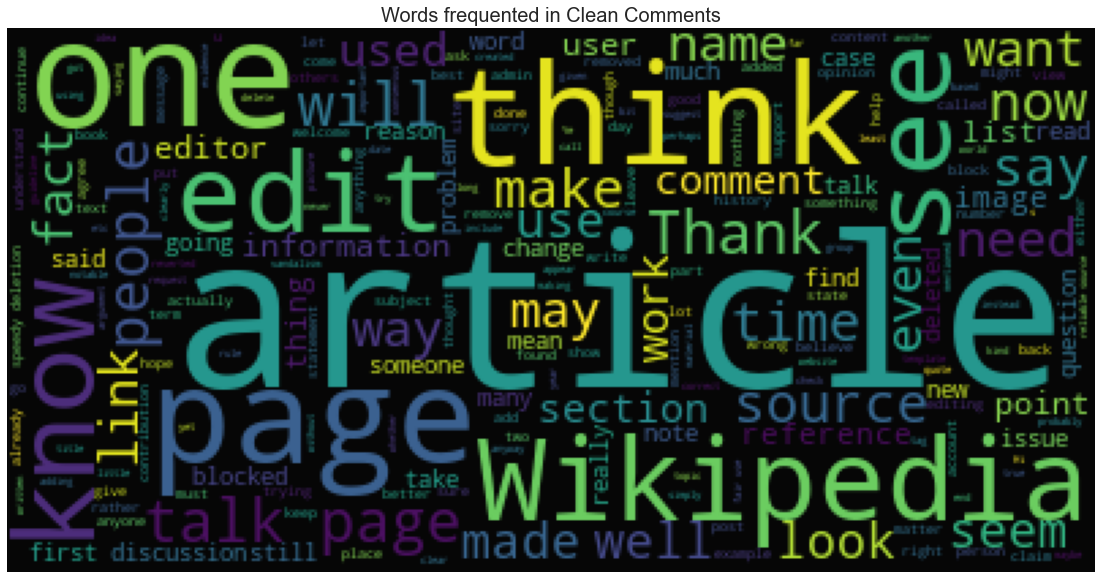

In [46]:
stopword=set(STOPWORDS)
subset=train[train.clean==True]
text=subset.comment_text.values
wc= WordCloud(background_color="black",max_words=2000,stopwords=stopword)
wc.generate(" ".join(text))
plt.figure(figsize=(20,10))
plt.axis("off")
plt.title("Words frequented in Clean Comments", fontsize=20)
plt.imshow(wc.recolor(colormap= 'viridis' , random_state=17), alpha=0.98)
plt.show()

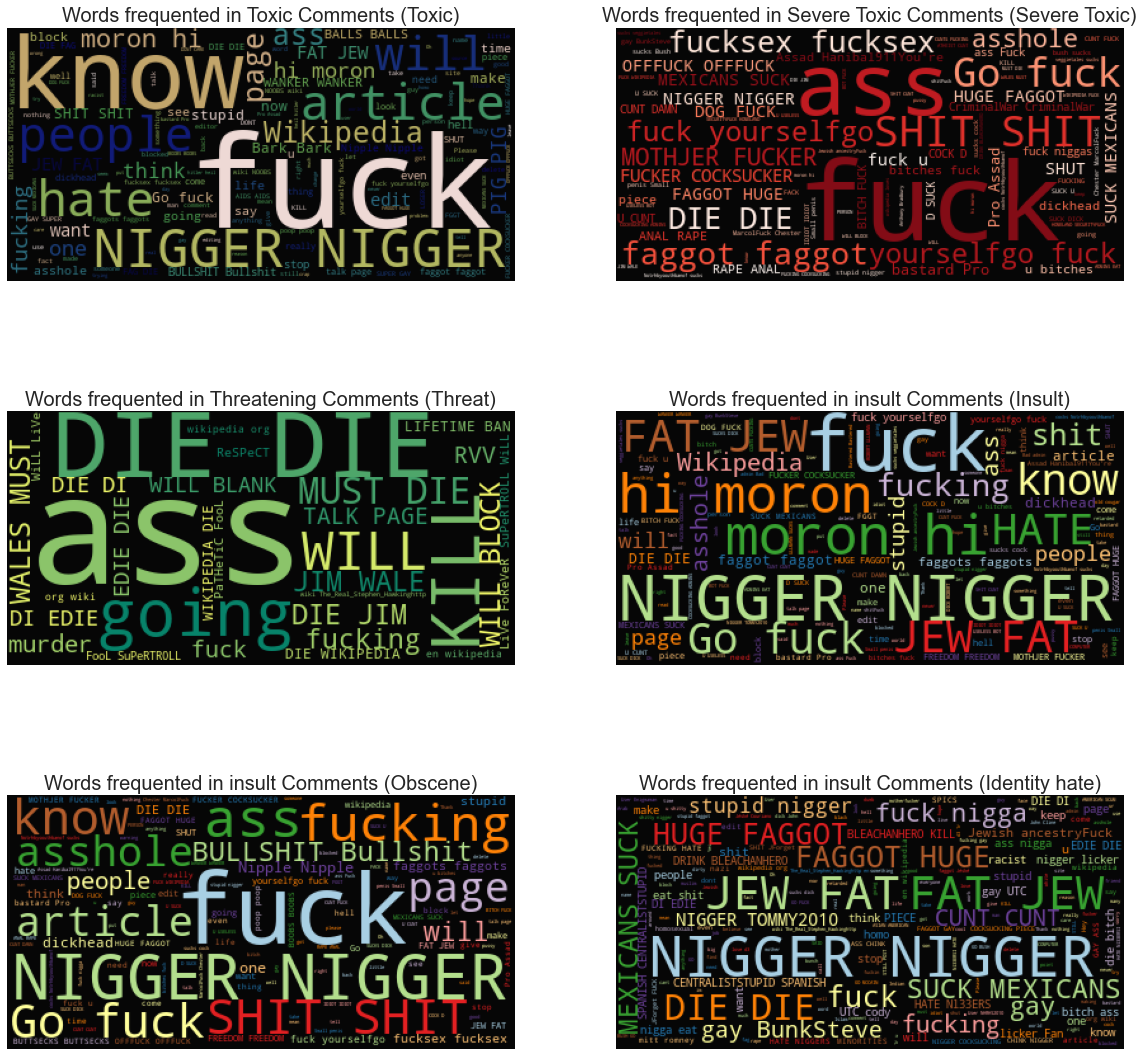

In [47]:
subset=train[train.toxic==1]
text=subset.comment_text.values
wc= WordCloud(background_color="black",max_words=4000,stopwords=stopword)
wc.generate(" ".join(text))

plt.figure(figsize=(20,20))
plt.subplot(321)
plt.axis("off")
plt.title("Words frequented in Toxic Comments (Toxic)", fontsize=20)
plt.imshow(wc.recolor(colormap= 'gist_earth' , random_state=244), alpha=0.98)

#Severely toxic comments
plt.subplot(322)
subset=train[train.severe_toxic==1]
text=subset.comment_text.values
wc= WordCloud(background_color="black",max_words=2000,stopwords=stopword)
wc.generate(" ".join(text))
plt.axis("off")
plt.title("Words frequented in Severe Toxic Comments (Severe Toxic)", fontsize=20)
plt.imshow(wc.recolor(colormap= 'Reds' , random_state=244), alpha=0.98)

#Threat comments
plt.subplot(323)
subset=train[train.threat==1]
text=subset.comment_text.values
wc= WordCloud(background_color="black",max_words=2000,stopwords=stopword)
wc.generate(" ".join(text))
plt.axis("off")
plt.title("Words frequented in Threatening Comments (Threat)", fontsize=20)
plt.imshow(wc.recolor(colormap= 'summer' , random_state=2534), alpha=0.98)

#insult
plt.subplot(324)
subset=train[train.insult==1]
text=subset.comment_text.values
wc= WordCloud(background_color="black",max_words=2000,stopwords=stopword)
wc.generate(" ".join(text))
plt.axis("off")
plt.title("Words frequented in insult Comments (Insult)", fontsize=20)
plt.imshow(wc.recolor(colormap= 'Paired_r' , random_state=244), alpha=0.98)


#obscene
plt.subplot(325)
subset=train[train.obscene==1]
text=subset.comment_text.values
wc= WordCloud(background_color="black",max_words=2000,stopwords=stopword)
wc.generate(" ".join(text))
plt.axis("off")
plt.title("Words frequented in insult Comments (Obscene)", fontsize=20)
plt.imshow(wc.recolor(colormap= 'Paired_r' , random_state=244), alpha=0.98)

#obscene
plt.subplot(326)
subset=train[train.identity_hate==1]
text=subset.comment_text.values
wc= WordCloud(background_color="black",max_words=2000,stopwords=stopword)
wc.generate(" ".join(text))
plt.axis("off")
plt.title("Words frequented in insult Comments (Identity hate)", fontsize=20)
plt.imshow(wc.recolor(colormap= 'Paired_r' , random_state=244), alpha=0.98)

plt.show()

## Class Imbalance

train 데이터셋의 클래스 불균형한지에 대한 여부를 확인한다.

In [48]:
print("Total comments: ", len(train))
print("Total clean comments: ", train['clean'].sum())
print("Total toxic comment tags: ", toxic_onehot_labels.sum().sum())

Total comments:  159571
Total clean comments:  143346
Total toxic comment tags:  35098


In [49]:
print("Check for missing values in Train dataset")
null_check_train = train.isnull().sum()
print(null_check_train, "\n")

print("Check for missing values in Test dataset")
null_check_test = test.isnull().sum()
print(null_check_test, "\n")

# Fill NA with "unknown" string
train["comment_text"].fillna("unknown", inplace=True)
test["comment_text"].fillna("unknown", inplace=True)

Check for missing values in Train dataset
id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
clean            0
dtype: int64 

Check for missing values in Test dataset
id              0
comment_text    0
dtype: int64 



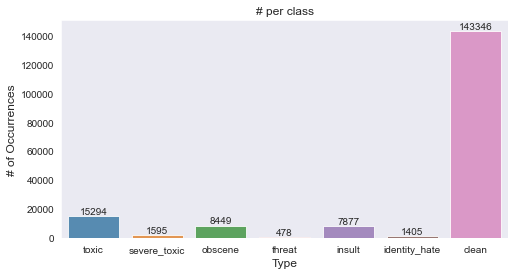

In [50]:
# Plotting counts per category

x = train.iloc[:,2:].sum()
plt.figure(figsize=(8, 4))
ax = sns.barplot(x.index, x.values, alpha=0.8)

plt.title("# per class")
plt.ylabel("# of Occurrences", fontsize=12)
plt.xlabel("Type", fontsize=12)

rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width()/2,
        height + 5,
        label, 
        ha='center',
        va="bottom"
    )
    
plt.show()

### 관찰 결과

- 각 class에 할당된 comment의 수가 균일한 분포를 띄고 있지 않다. 따라서 class imbalance 문제를 맞닥뜨릴 수 있다.
- 전체 train 데이터셋은 약 약 159k 건, 그런데 toxic comment tag 수는 약 35k 건, clean comment 수는 약 143건.
    - Multi-tagging이 있으므로 가능하다. 즉, 각 class가 서로 exclusive한 multi-class문제가 아닌 1건의 comment가 1개 이상의 class를 가지느 multi-label문제일 가능성이 있다.

## Multi-tagging

percentile for each tag count:
0    0.898321
1    0.039857
3    0.026377
2    0.021808
4    0.011030
5    0.002413
6    0.000194
dtype: float64


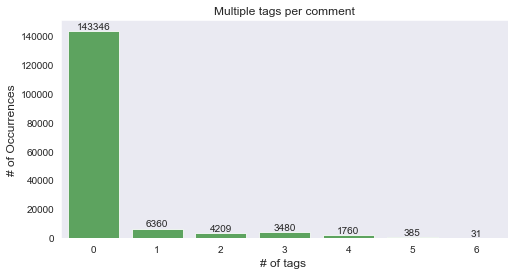

In [51]:
print("percentile for each tag count:")
print(rowsums.value_counts('per'))
x = rowsums.value_counts()

plt.figure(figsize=(8,4))
ax = sns.barplot(x.index, x.values, alpha=0.8,color=color[2])
plt.title("Multiple tags per comment")
plt.ylabel('# of Occurrences', fontsize=12)
plt.xlabel('# of tags ', fontsize=12)

rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

- 2개 이상의 label이 태깅된 comment가 있음을 확인할 수 있다.

## Correlation

<AxesSubplot:>

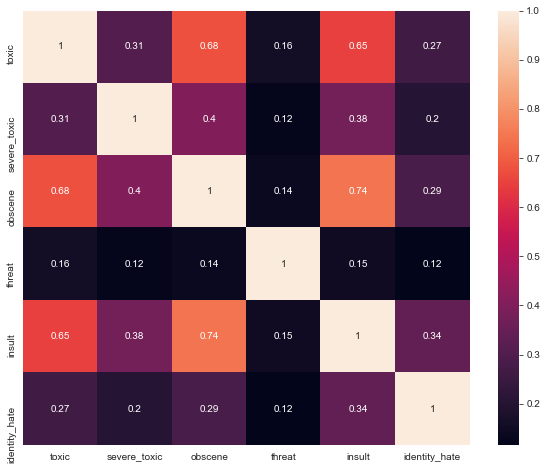

In [52]:
temp_df = train.iloc[:, 2:-1]
corr = temp_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr,
            xticklabels = corr.columns.values,
            yticklabels = corr.columns.values,
            annot=True)

Correlation matrix의 결과를 살펴봤을 때;
1. toxic은 obscene과 insult와 상관성이 높다 (0.68, 0.65)
2. toxic과 severe_toxic의 상관성은 낮다 (0.31)
3. insult과 obscene의 상관성은 높다 (0.74)

## Crosstab

- 범주형 데이터의 상관성을 분석하기 위해서는 교차분석표를 통한 분석이 적절하다.
- 카이제곱검정의 확장인 [Cramer's V stat](https://en.wikipedia.org/wiki/Cram%C3%A9r%27s_V)을 통해 분석해보도록 한다.
- 결과는 Correlation Matrix를 살펴봤을 때와 매우 유사하다.

In [66]:
import scipy.stats as ss

def cramers_corrected_stat(confusion_matrix):
    """ calculate Cramers V statistic for categorial-categorial association.
        uses correction from Bergsma and Wicher, 
        Journal of the Korean Statistical Society 42 (2013): 323-328
    """
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min( (kcorr-1), (rcorr-1)))

In [72]:
for col_1 in temp_df.columns:
    for col_2 in temp_df.columns:
        if col_1 == col_2:
            pass
        else:

            confusion_matrix = pd.crosstab(temp_df[col_1], temp_df[col_2])
            print("{0} VS {1}".format(col_1, col_2))
            print("Confusion matrix")
            print(confusion_matrix)
            new_corr=cramers_corrected_stat(confusion_matrix)
            print("Correlation using Cramer's stat:\n", new_corr)
            print("\n")

toxic VS severe_toxic
Confusion matrix
severe_toxic       0     1
toxic                     
0             144277     0
1              13699  1595
Correlation using Cramer's stat:
 0.30850290540548614


toxic VS obscene
Confusion matrix
obscene       0     1
toxic                
0        143754   523
1          7368  7926
Correlation using Cramer's stat:
 0.6764644772231891


toxic VS threat
Confusion matrix
threat       0    1
toxic              
0       144248   29
1        14845  449
Correlation using Cramer's stat:
 0.15684415261524137


toxic VS insult
Confusion matrix
insult       0     1
toxic               
0       143744   533
1         7950  7344
Correlation using Cramer's stat:
 0.6474661802275932


toxic VS identity_hate
Confusion matrix
identity_hate       0     1
toxic                      
0              144174   103
1               13992  1302
Correlation using Cramer's stat:
 0.26588449189333063


severe_toxic VS toxic
Confusion matrix
toxic              0      1
seve

### 댓글 관찰

In [54]:
print("toxic:")
print(train[train.severe_toxic==1].iloc[3,1])

toxic:
Hi 

Im a fucking bitch.

50.180.208.181


In [55]:
print("identity_hate:")
print(train[train.identity_hate==1].iloc[4,1])

identity_hate:
u r a tw@ fuck off u gay boy.U r smelly.Fuck ur mum poopie


몇몇 댓글을 관찰한 바에 따르면 몇 가지 주목할 점이 있다. 이러한 점들은 모델 학습 시 심한 과적합을 일으킬 수 있다. 데이터 정제, 또는 정규화, 일반화가 필요함을 주목할 수 있는 부분이다.

- 댓글 내부에 IP주소가 포함되는 케이스.
- 댓글이 복사한 듯 매우 유사할 수 있음.
- 댓글이 유저 이름이나 의미를 유추할 수 없는 숫자 등을 포함하고 있음.

